<center><img src="https://images.pexels.com/photos/3769532/pexels-photo-3769532.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="1300" height="500"></center>

<b><h2><center> Airline Customer Review Sentiment Analysis </center></h2></b>

## Problem Statement

### Business Context

In today's digital age, social media platforms like Twitter have become a prominent channel for customers to share their experiences and opinions, and the airline industry is no exception. Passengers frequently turn to Twitter to express their thoughts, feelings, and experiences related to their air travel. The ease of access and immediacy of social media has empowered customers to voice their opinions in real-time, making it a valuable source of feedback for airlines. The airline company recognized the immense value of these insights to understand customer sentiment and continuously enhance the travel experience.

However, the airline company faces a significant challenge with the rise of negative feedback on social media. Negative sentiments expressed by customers become a crucial problem to solve as they can lead to several detrimental effects, including:

1. Customer Churn: Unaddressed negative sentiment can lead to customer dissatisfaction and ultimately result in passengers choosing competitors for their future travel needs. This translates to a loss of loyal customers, impacting long-term revenue and market share.

2. Reputation Damage: Persistent negative sentiment, if left unmanaged, can tarnish an airline's reputation, and influence potential passengers to avoid booking with the airline. A damaged reputation can have lasting consequences, affecting brand loyalty and trust.

3. Financial Loss: Loss of revenue can occur if negative sentiment drives passengers away, impacting the airline's profitability and long-term success. Negative feedback can discourage potential passengers from making bookings with the airline, leading to direct financial repercussions

### Problem Definition

The airline has noticed a trend as it grew - the amount of feedback coming through conventional channels (airline feedback forms, surveys, etc.) has reduced and customers have started sharing their feedback by tagging the airline's official social media handles. The volume of feedback being received on social media has significantly increased (~25%) over the past six months. In particular, the official Twitter handle of the airline saw a 50% increase in mentions. While they were initially tracking the social media feedback manually, the recent increase in volume has made it difficult to continue the same. This has prompted the airline to seek an AI-based solution to analyze the feedback provided by customers on social media. They believe that such a solution will be more effective than their current methods and provide insights that can proactively help them minimize revenue loss. As a first step, they want to start by assessing the feedback provided by customers on social media and categorizing the sentiment of the customer as negative, positive, or neutral.

My role is to provide with the tweets shared by customers regarding their experience with the airline's services. The objective is to analyze the data and build a predictive model that can parse the customer reviews and predict the sentiment of the customer.

### Data Dictionary

* tweet_id - A unique identifier for each tweet                                                          
* airline_sentiment - The sentiment label of the tweet, such as positive, negative, or neutral                                               
* airline_sentiment_confidence - The confidence level associated with the sentiment label                               
* negativereason - A category indicating the reason for negative sentiment                                                   
* negativereason_confidence - The confidence level associated with the negative reason                                    
*airline - The airline associated with the tweet                                                                   
* airline_sentiment_gold - Gold standard sentiment label                                               
* name - The username of the tweet author    
* retweet_count - The number of times the tweet has been retweeted
* text - The actual text content of the tweet.
* tweet_coord - Coordinates of the tweet
* tweet_created - The timestamp when the tweet was created
* tweet_location - The location mentioned in the tweet
* user_timezone - The timezone of the tweet author

## Importing the necessary libraries

In [ ]:
# installing the libraries to load transformers models
!pip install --quiet transformers

In [ ]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Import modules from scikit-learn for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report

# Import TensorFlow for deep learning tasks
import tensorflow as tf

# Import modules from the Hugging Face Transformers library
from transformers import BertTokenizer, TFBertForSequenceClassification

In [ ]:
# Set the seed for the TensorFlow random number generator to ensure reproducibility
tf.random.set_seed(42)

## Loading the dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
df = pd.read_csv('/content/US_Airways.csv')

In [ ]:
# creating a copy of the dataset
data = df.copy()

## Data Overview

### Checking the first five rows of the data

In [ ]:
# Print first 5 rows of data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570310600460525568,negative,0.6292,Flight Booking Problems,0.3146,US Airways,NaN,jhazelnut,NaN,0,@USAirways is there a better time to call? My...,NaN,2015-02-24 11:53:37 -0800,NaN,NaN
1,570310144459972608,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,GAKotsch,NaN,0,@USAirways and when will one of these agents b...,NaN,2015-02-24 11:51:48 -0800,NaN,Atlantic Time (Canada)
2,570309340952993796,neutral,1.0000,NaN,NaN,US Airways,NaN,DebbiMcGinnis,NaN,0,@USAirways is a DM possible if you aren't foll...,NaN,2015-02-24 11:48:37 -0800,Missourah,Hawaii
3,570309000279023616,neutral,1.0000,NaN,NaN,US Airways,NaN,AshleyKAtherton,NaN,0,@USAirways Fortunately you have staff like Lyn...,NaN,2015-02-24 11:47:16 -0800,NaN,Central Time (US & Canada)
4,570308799950692353,negative,1.0000,Customer Service Issue,0.6452,US Airways,NaN,retardedlarry,NaN,0,@USAirways just hung up on me again. Another ...,NaN,2015-02-24 11:46:28 -0800,NaN,NaN


In [ ]:
# checking a customer review
data['text'][3]

'@USAirways Fortunately you have staff like Lynn S. and DeeDee who actually understand customer service and simply being NICE.'

### Checking the shape of the dataset

In [ ]:
# print shape of data
data.shape

(2913, 15)

* The data comprises of ~3k customer reviews

### Checking for Missing Values

In [ ]:
# Check for NULL values
data.isnull().sum(axis=0)

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                   650
negativereason_confidence        443
airline                            0
airline_sentiment_gold          2910
name                               0
negativereason_gold             2911
retweet_count                      0
text                               0
tweet_coord                     2763
tweet_created                      0
tweet_location                  1069
user_timezone                   1062
dtype: int64

In this dataset, the main focus is on two columns, namely 'content' and 'sentiment.' Fortunately, these columns do not contain any missing values. As a result, there is no need to address missing values in other columns.

### Checking the statistical summary

In [ ]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,2.913000e+03,2913.000000,2470.000000,2913.000000
mean,5.691208e+17,0.921578,0.687172,0.085479
std,7.676358e+14,0.149996,0.307860,1.172269
min,5.676433e+17,0.340000,0.000000,0.000000
25%,5.684797e+17,1.000000,0.622350,0.000000
50%,5.693176e+17,1.000000,0.677700,0.000000
75%,5.697157e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


- `tweet_id` is a unique ID for a tweet, so we can discard it from our analysis
- There is minimal retweeting of customers tweets
    - However, this might vary by customer sentiment, so I'll check for that later

## Exploratory Data Analysis (EDA)


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Distribution of sentiments

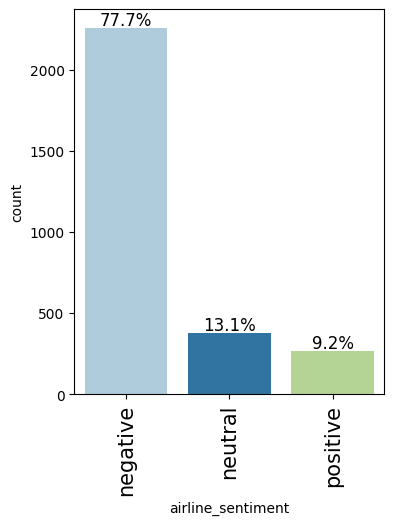

In [ ]:
labeled_barplot(data, "airline_sentiment", perc=True)

- Majority of the tweets are negative (78%), followed by neutral tweets (13%), and then the positive tweets (9%)

#### Distribution of negative sentiment reasons

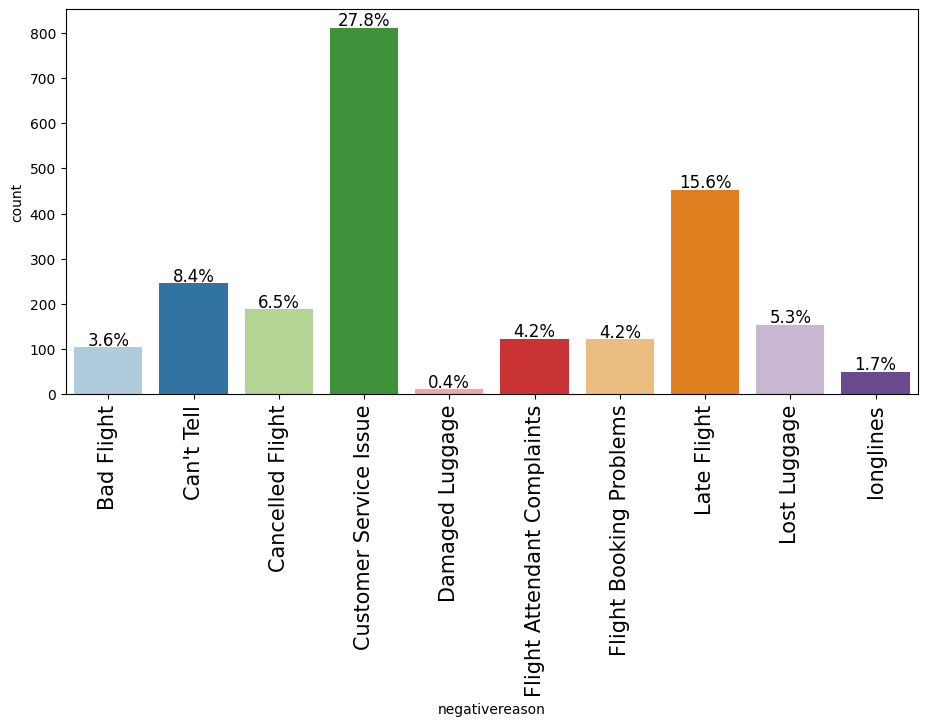

In [ ]:
labeled_barplot(data, "negativereason", perc=True)

* The predominant causes of negative tweets appear to be customer service issues (28%) and late flights (16%)

#### Distribution of retweets

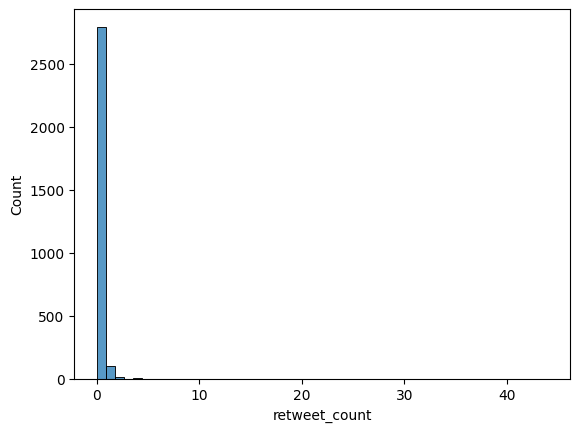

In [ ]:
sns.histplot(data, x='retweet_count', bins =50);

- A majority of the customer tweets are not re-tweeted
- The lower number of retweet counts suggests that customers are less inclined to retweet

### Bivariate Analysis

Checking the relationship between retweets and customer sentiment

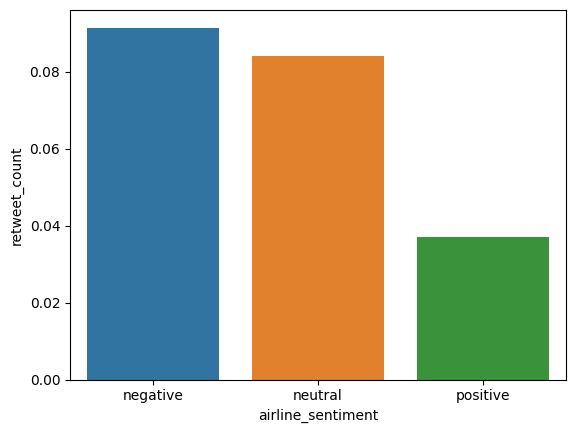

In [ ]:
sns.barplot(data, y='retweet_count', x='airline_sentiment', errorbar=('ci', False));

* On average, negative sentiment tweets get re-tweeted the most

## Data Preprocessing

In [ ]:
dataset = data.copy()

#### **Splitting the dataset**

In [ ]:
# Creating dependent and independent variables
X = dataset['text']
y = dataset['airline_sentiment']

In [ ]:
from sklearn.model_selection import train_test_split

# Initial split into training (80%) and testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
X_train.shape, X_test.shape, X_valid.shape

((2330,), (292,), (291,))

In [ ]:
# Instantiate a LabelEncoder to encode categorical labels into numerical values
encoder = LabelEncoder()

# Create DataFrames for training, validation, and testing sets
# Encoding the target variable and adding it to the respective DataFrames
# Resetting index for consistency in DataFrames

# Training set
ds_train = pd.DataFrame(data=X_train, columns=['text'])
ds_train['target'] =  encoder.fit_transform(y_train)
ds_train = ds_train.reset_index(drop=True)

# # Validation set
ds_valid = pd.DataFrame(data=X_valid, columns=['text'])
ds_valid['target'] =  encoder.transform(y_valid)
ds_valid = ds_valid.reset_index(drop=True)

# # Testing set
ds_test = pd.DataFrame(data=X_test, columns=['text'])
ds_test['target'] =  encoder.transform(y_test)
ds_test = ds_test.reset_index(drop=True)

#### **Tokenization**

Tokenization is a fundamental step in preparing text data for machine learning models, allowing them to effectively process and learn from textual information. It facilitates the conversion of text into a format that can be easily fed into models, enabling them to understand and make predictions based on language patterns.

In [ ]:
## tokenizing
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

* `pretrained_model_name_or_path`: takes the name/path of the model for which tokenizer needs to be imported
    * We're passing '*bert-base-cased*' as we want to load BERT base model's tokenizer

* Both the BERT base and large models have two available variants

    * **cased**: Preserves case information and may capture subtle nuances in meaning based on capitalization
    * **uncased**: Ignores case and may not capture subtle meaning differences based on case

In [ ]:
# Function to convert text examples to BERT-compatible features
# Parameters:
# - review: The input text to be converted
# Returns:
# - Dictionary containing BERT-compatible encoding, including special tokens,
#   attention mask, and padding to ensure consistent input length
def convert_example_to_feature(review, max_length):
    return tokenizer.encode_plus(
        review,
        max_length=max_length,    # max length of the text that can go to BERT
        padding='max_length',
        return_attention_mask=True,  # add attention mask to not focus on pad tokens
    )

* **padding='max_length'**: Enables padding to ensure uniform length sequences. All sequences are padded to have the length of the longest input sequence

**Note**: Padding is the process of adding special tokens to sequences to make them of equal length. When the padding value is set to true during tokenization, the tokenizer automatically adds special tokens to shorter sequences in a batch, ensuring all sequences have the same length. When set to false, sequences of varying lengths are not padded, and manual handling of variable-length sequences is required. This approach may introduce additional complexity in handling input data during training.

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
        "input_ids": input_ids,
        "token_type_ids": token_type_ids,
        "attention_mask": attention_masks,
    }, label

In [ ]:
# Function to encode examples from a Pandas DataFrame into a TensorFlow dataset
# Parameters:
# - ds: Pandas DataFrame containing text examples and labels
# Returns:
# - TensorFlow dataset containing input_ids, attention_mask, token_type_ids, and labels
def encode_examples(ds, max_length):
    # Prepare lists to build up the final TensorFlow dataset from slices
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []

    # Iterate over rows in the DataFrame
    for row in ds.values:
        # Convert the text example to BERT-compatible features
        bert_input = convert_example_to_feature(row[0], max_length)

        # Append the individual components to their respective lists
        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append([row[1]])

    # Create a TensorFlow dataset from the lists and apply the mapping function
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Maximum length of input sequences for BERT model
max_length = 512

# Batch size for the data
batch_size = 6

# Encode and batch the training dataset
ds_train_encoded = encode_examples(ds_train, max_length).batch(batch_size)

# Encode and batch the validation dataset
ds_valid_encoded = encode_examples(ds_valid, max_length).batch(batch_size)

# Encode and batch the test dataset
ds_test_encoded = encode_examples(ds_test, max_length).batch(batch_size)

In [ ]:
ds_train_encoded

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.int32, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>

* **input_ids**: This key contains the tokenized representation of the input text in the form of token IDs. Each token in the text is converted into a unique integer ID, and these IDs are stored in a sequence under the 'input_ids' key.

* **token_type_ids**: In the case of models that can handle multiple sequences (e.g., for tasks like question-answering where there are two input sequences - question and answer), this key represents the segment or token type IDs. It helps the model distinguish between different segments of the input.

* **attention_mask**: This key contains a binary mask indicating which positions in the input text are actual tokens as opposed to padding tokens. The attention mask is used to tell the model which tokens to pay attention to and which ones to ignore during processing.

## Model Building

### Loading the Model

In [ ]:
# Model initialization using BERT for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', from_pt=True, num_labels=3)

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Note** - The message in the output is informing that while the main BERT model was loaded from the pre-trained weights successfully, the classification head was not loaded and was initialized randomly. To use the model effectively for specific task, one should fine-tune it on own dataset.

- **from_pt**: Defines whether the model weights should be as the ones from the PyTorch version
    - Setting to *True* ensure we use the PyTorch weights

- **num_labels**: This parameter specifies the number of labels or classes for the sequence classification task. In this example, the model is configured for a task with three labels.
  -  This value is based on the number of classes in your specific classification problem.

In [ ]:
# print the summary of the model
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 109484547 (417.65 MB)
Trainable params: 109484547 (417.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Layers Overview**

* **bert (TFBertMainLayer)**: This is the main BERT layer responsible for processing input sequences. It has number of parameters (109,482,240), which are the
weights and biases that the model has learned during pre-training. This layer is designed to capture contextualized representations of input tokens.

* **dropout_37 (Dropout)**: Dropout is a regularization technique used to prevent overfitting. This layer applies dropout to the output of the BERT layer. In the summary, it's mentioned as having multiple output shapes, and it has 0 parameters since dropout doesn't introduce new parameters.

* **classifier (Dense)**: This is the final dense layer responsible for the sequence classification. It has 2,307 parameters, which are the weights and biases for mapping the BERT representation to the final output classes. The output shape is also mentioned as multiple, as it depends on the number of classes in your classification task.

### Fine-tuning the model

In [ ]:
# setting the learning rate for the optimizer
learning_rate = 2e-5

# Setting the optimizer to Adam
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

# Specify the loss function for the model
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define evaluation metric(s) for the model
metric = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]

# Compile the model with the chosen optimizer, loss function, and metrics
model.compile(optimizer=optimizer, loss=loss, metrics=metric)

Training a machine learning model, imbalanced datasets can lead to biased model predictions, as the model may prioritize the majority class due to its prevalence. Class weights help to mitigate this issue by assigning higher weights to underrepresented classes, encouraging the model to pay more attention to these classes during training.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (ds_train.shape[0]) / np.bincount(ds_train.iloc[:, 1].values)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {0: cw[0], 1: cw[1], 2: cw[2]}

- To define class weights, we first take the number of samples using `ds_train.shape[0]` - (I)
- `np.bincount` us then used to count occurrences of each label and calculate class frequencies - (II)
- We divide (I) by (II) to get the required class weights

In [ ]:
# Number of training epochs
number_of_epochs = 5

bert_base_tuned = model.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_valid_encoded, class_weight=cw_dict)

Epoch 1/5
389/389 [==============================] - 378s 759ms/step - loss: 2.3562 - accuracy: 0.6970 - val_loss: 0.4073 - val_accuracy: 0.8419
Epoch 2/5
389/389 [==============================] - 298s 765ms/step - loss: 1.2135 - accuracy: 0.8481 - val_loss: 0.3799 - val_accuracy: 0.8488
Epoch 3/5
389/389 [==============================] - 297s 764ms/step - loss: 0.6850 - accuracy: 0.9232 - val_loss: 0.5045 - val_accuracy: 0.8110
Epoch 4/5
389/389 [==============================] - 297s 764ms/step - loss: 0.4448 - accuracy: 0.9545 - val_loss: 0.4846 - val_accuracy: 0.8316
Epoch 5/5
389/389 [==============================] - 297s 764ms/step - loss: 0.2822 - accuracy: 0.9725 - val_loss: 0.5703 - val_accuracy: 0.8522


### Model performance evaluation

In [ ]:
# Generate raw predictions on the validation dataset using the trained model
preds_raw_val = model.predict(ds_valid_encoded)

# Extract predicted labels by finding the index with the highest probability for each example
preds_val = np.argmax(np.array(tf.nn.softmax(preds_raw_val.logits)), axis=1)

# Display the shape of the predicted labels array
preds_val.shape

49/49 [==============================] - 16s 269ms/step


(291,)

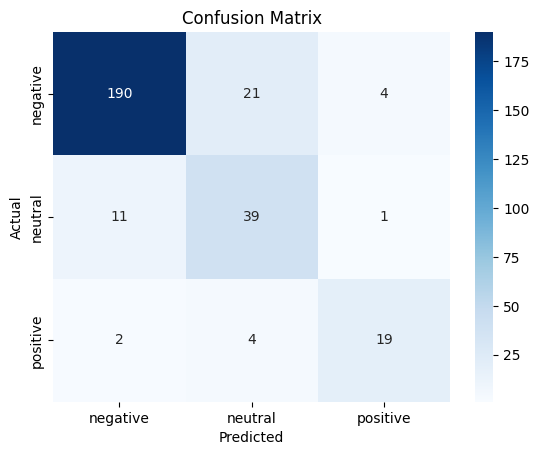

In [ ]:
# Creating confusion matrix
cnf_mt = confusion_matrix(ds_valid['target'], preds_val)

# Visualizing confusion matrix using a heatmap
labels = ['negative', 'neutral', 'positive']
sns.heatmap(cnf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display classification report
print('Classification Report:')
print(classification_report(ds_valid['target'], preds_val))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       215
           1       0.61      0.76      0.68        51
           2       0.79      0.76      0.78        25

    accuracy                           0.85       291
   macro avg       0.78      0.80      0.79       291
weighted avg       0.87      0.85      0.86       291



- The model achieved ~85% accuracy on the validation set
- It also has a 85% recall (weighted average across all possible outcomes), which is good

## Model Testing

In [ ]:
preds_raw_test = model.predict(ds_test_encoded)
preds_test = np.argmax(np.array(tf.nn.softmax(preds_raw_test.logits)), axis=1)
preds_test.shape

49/49 [==============================] - 13s 268ms/step


(292,)

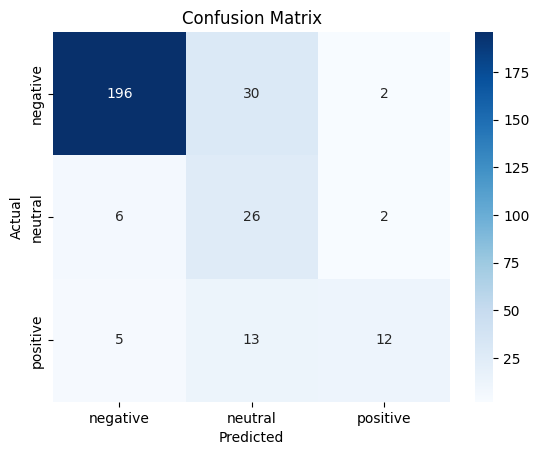

In [ ]:
# Creating confusion matrix
cnf_mt = confusion_matrix(ds_test['target'], preds_test)

# Visualizing confusion matrix using a heatmap
labels = ['negative', 'neutral', 'positive']
sns.heatmap(cnf_mt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Display classification report
print('Classification Report:')
print(classification_report(ds_test['target'], preds_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       228
           1       0.38      0.76      0.50        34
           2       0.75      0.40      0.52        30

    accuracy                           0.80       292
   macro avg       0.69      0.67      0.64       292
weighted avg       0.86      0.80      0.82       292



- The model achieved ~80% accuracy on the test set
- It also has a 80% recall (weighted average across all possible outcomes), which is good

## Summary

- I fine-tuned a BERT model to get a 80% accuracy on the test set

- To try to improve the model performance, one can try the following:
    - increase the number of training epochs
    - change the learning rate
    - change the batch size
    - use regularization techniques

**Note**: The performance metric values may differ slightly on code execution due to the randomness in initializing the weights of the 'classifier' layer of the model.

___